In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
covid=pd.read_csv('covid_statewise.csv')

In [3]:
worker=pd.read_csv('worker2001.csv')

In [4]:
production=pd.read_csv('Agrihectare_govt.csv')

In [5]:
density = pd.read_csv('population_density.csv')

In [6]:
covid1 = pd.DataFrame(columns=['State/UT', 'Active'])

In [7]:
l=list(covid['State/UT'])
covid1['State/UT']=l

In [8]:
l=list(covid['Active'])
for i in range(0,len(l)):
    if(l[i]=='-'):
        l[i]='0'
for i in range(0,len(l)):
    temp=l[i].split(',')
    y=''.join(temp)
    l[i]=int(y)

In [9]:
covid1['Active covid cases']=l

In [10]:
covid1.drop(axis=1,index=30,inplace=True)

In [11]:
covid1.sort_values(by='State/UT',inplace=True)

In [12]:
l=np.arange(1,31)
covid1.set_index(l , inplace=True)

In [13]:
l=list(worker['migrant worker'])
for i in range(0,len(l)):
    temp=l[i].split(',')
    y=''.join(temp)
    l[i]=int(y)

In [14]:
covid1['migrant workers']=l

In [15]:
l=list(production['total_prod'])

In [16]:
covid1['total agri prod,in hectare']=l

In [17]:
#covid1.drop(axis=0,columns='Active',inplace=True)

In [18]:
l=list(density['Population Density '])

In [19]:
covid1['population density']=l

In [20]:
covid1.drop(columns='Active',inplace=True)

In [21]:
#covid1.to_excel(r'C:\Users\user\HackathonVitBhopal\code2.ipynb.xlsx', sheet_name='attempt 1', index = False)


In [22]:
#covid1.columns

In [23]:
#covid1['Active covid cases']=covid1['Active covid cases'].apply(int)

In [24]:
#covid1['population density'].max()

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scalar1=MinMaxScaler()

In [27]:
scalar1.fit(covid1['Active covid cases'].values.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [28]:
covid1['scaled_Active covid cases']=scalar1.transform(covid1['Active covid cases'].values.reshape(-1,1))

In [29]:
scalar2=MinMaxScaler()

In [30]:
scalar2.fit(covid1['migrant workers'].values.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [31]:
covid1['scaled_migrant workers']=scalar2.transform(covid1['migrant workers'].values.reshape(-1,1))

In [32]:
scalar3=MinMaxScaler()

In [33]:
scalar3.fit(covid1['total agri prod,in hectare'].values.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [34]:
covid1['scaled_total agri prod,in hectare']=scalar3.transform(covid1['total agri prod,in hectare'].values.reshape(-1,1))

In [35]:
scalar4=MinMaxScaler()

In [36]:
scalar4.fit(covid1['population density'].values.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [37]:
covid1['scaled_population density']=scalar4.transform(covid1['population density'].values.reshape(-1,1))

In [38]:
covid1.head()

,State/UT,Active covid cases,migrant workers,"total agri prod,in hectare",population density,scaled_Active covid cases,scaled_migrant workers,"scaled_total agri prod,in hectare",scaled_population density
1,Andaman and Nicobar Islands,18,87224,21856,46,0.002390,0.000000,0.000990,0.002566
2,Andhra Pradesh,1580,12202795,14293266,307,0.209827,0.588195,0.676231,0.025657
3,Arunachal Pradesh,0,225768,383872,17,0.000000,0.006726,0.018119,0.000000
4,Assam,10,2967253,2999070,398,0.001328,0.139822,0.141855,0.033708
5,Bihar,300,7201618,6387561,1106,0.039841,0.345394,0.302179,0.096346


In [39]:
final=[]
for i in range(1,31):
    sum=covid1['scaled_Active covid cases'][i]+covid1['scaled_migrant workers'][i]+covid1['scaled_total agri prod,in hectare'][i]+covid1['scaled_population density'][i]
    factor=850
    sum=sum*850
    final.append(int(sum))

In [40]:
covid1['Food Banks']=final

In [41]:
covid1.head()

,State/UT,Active covid cases,migrant workers,"total agri prod,in hectare",population density,scaled_Active covid cases,scaled_migrant workers,"scaled_total agri prod,in hectare",scaled_population density,Food Banks
1,Andaman and Nicobar Islands,18,87224,21856,46,0.002390,0.000000,0.000990,0.002566,5
2,Andhra Pradesh,1580,12202795,14293266,307,0.209827,0.588195,0.676231,0.025657,1274
3,Arunachal Pradesh,0,225768,383872,17,0.000000,0.006726,0.018119,0.000000,21
4,Assam,10,2967253,2999070,398,0.001328,0.139822,0.141855,0.033708,269
5,Bihar,300,7201618,6387561,1106,0.039841,0.345394,0.302179,0.096346,666


In [42]:
covid1.to_excel(r'final2.xlsx', sheet_name='final', index = False)


In [43]:
covid1.to_csv(r'finalcsv.csv',index = False)

In [44]:
food_Bank = pd.DataFrame(columns=['State/UT', 'Food bank'])

In [45]:
l1=list(covid1['State/UT'])
food_Bank['State/UT']=l1

In [46]:
l2=list(covid1['Food Banks'])
food_Bank['Food bank']=l2

In [47]:
#### This is final result
food_Bank.head()

,State/UT,Food bank
0,Andaman and Nicobar Islands,5
1,Andhra Pradesh,1274
2,Arunachal Pradesh,21
3,Assam,269
4,Bihar,666


In [48]:
food_Bank.to_csv(r'finallastcolcsv.csv',index = False)

In [49]:

### G R A P H     P L O T


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

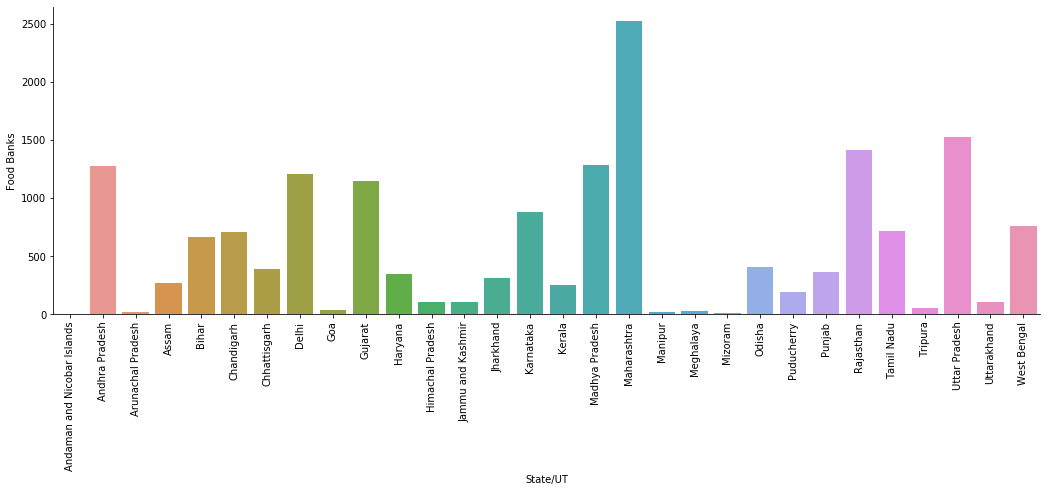

In [50]:
sns.catplot(x='State/UT',y='Food Banks',kind= 'bar',data=covid1,aspect=3,margin_titles=True)
plt.xticks(rotation=90)

In [51]:
#covid1[].plot.pie(subplots=True,figsize=(13,13))